In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import matplotlib.dates as mdates
import matplotlib as mpl

from datetime import datetime
from api.definer.data import graph

mpl.style.use('classic')

Pool Address:

In [2]:
address = "0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640"      # USDC-ETH 0.05% Uniswap V3 pool on Ethereum chain
# address = "0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8"    # ETH USDC Ethereum
# address = "0x2e9c575206288f2219409289035facac0b670c2f"    # ETH DAI Optimism
# address = "0x68f180fcce6836688e9084f035309e29bf0a2095"    # WBTC DAI
# address = "0x93f267fd92b432bebf4da4e13b8615bb8eb2095c"    # snx eth
# address = "0xcb0c5d9d92f4f2f80cce7aa271a1e148c226e19d"    # Rai Dai

In [3]:
after = '2022-01-01'  # 1632081600

In [4]:
dpd = graph(address, int(datetime.timestamp(datetime.strptime(after, "%Y-%m-%d"))))
dpd.head()

2021-12-31 16:00:00


,periodStartUnix,liquidity,high,low,close,feeGrowthGlobal0X128,feeGrowthGlobal1X128,pool.totalValueLockedUSD,pool.totalValueLockedToken1,pool.totalValueLockedToken0,pool.token0.decimals,pool.token1.decimals
0,1.704618e+09,1.163547e+19,2241.846549,2234.529958,2234.529958,2.554209e+33,1.236913e+42,3.838092e+08,74572.123773,2.167592e+08,6.0,18.0
1,1.704614e+09,1.163772e+19,2253.859847,2241.346076,2241.403962,2.554207e+33,1.236904e+42,3.838092e+08,74572.123773,2.167592e+08,6.0,18.0
2,1.704611e+09,1.167675e+19,2251.301777,2248.178280,2249.377848,2.554175e+33,1.236884e+42,3.838092e+08,74572.123773,2.167592e+08,6.0,18.0
3,1.704607e+09,1.167535e+19,2251.022841,2244.131064,2250.042834,2.554159e+33,1.236876e+42,3.838092e+08,74572.123773,2.167592e+08,6.0,18.0
4,1.704604e+09,1.165569e+19,2250.559143,2231.320080,2244.170942,2.554141e+33,1.236873e+42,3.838092e+08,74572.123773,2.167592e+08,6.0,18.0


The global state also tracks two numbers: feeGrowthGlobal0 (f_g,0) and feeGrowthGlobal1 (f_g,1).     
These represent the total amount of fees that have been earned per unit of virtual liquidity (L), over the entire history of the contract.

<AxesSubplot:xlabel='periodStartUnix', ylabel='close'>

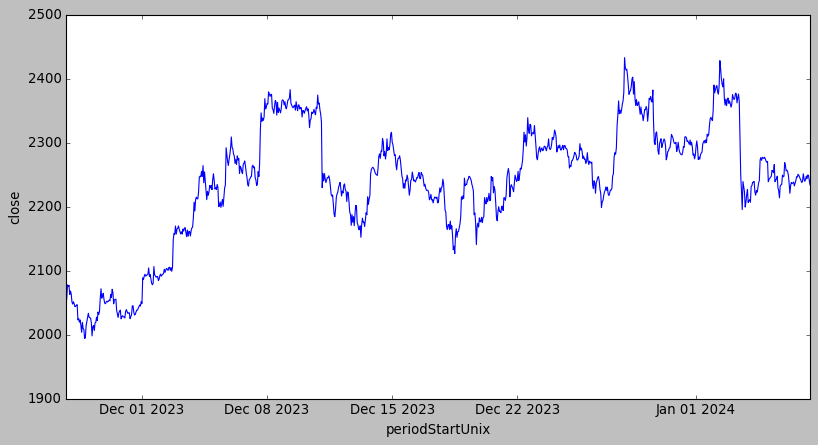

In [5]:
f = plt.figure(figsize=(12,6))
sns.lineplot(x=pd.to_datetime(dpd.periodStartUnix, unit='s'), y=dpd.close)

In [7]:
print(datetime.utcfromtimestamp(
    dpd.periodStartUnix.min()
).strftime('%Y-%m-%d %H:%M:%S'))
print(datetime.utcfromtimestamp(
    dpd.periodStartUnix.max()
).strftime('%Y-%m-%d %H:%M:%S'))

2023-11-26 12:00:00
2024-01-07 03:00:00


In [10]:
decimal0 = dpd.iloc[0]['pool.token0.decimals']
decimal1 = dpd.iloc[0]['pool.token1.decimals']
decimal = decimal1 - decimal0
print("Number of decimals chosen in the Token 0 USDC ERC-20 contract is:", int(decimal0))
print("Number of decimals chosen in the Token 1 ETH ERC-20 contract is:", int(decimal1))
print(int(decimal))

Number of decimals chosen in the Token 0 USDC ERC-20 contract is: 6
Number of decimals chosen in the Token 1 ETH ERC-20 contract is: 18
12


In [11]:
dpd['feeGrowthGlobal0X128'].iloc[0]

2.5540633787748752e+33

In [12]:
dpd['fg0'] = ((dpd['feeGrowthGlobal0X128']) / (2 ** 128)) / (10 ** decimal0)
dpd['fg1'] = ((dpd['feeGrowthGlobal1X128']) / (2 ** 128)) / (10 ** decimal1)

In [13]:
print(dpd['close'].iloc[-1])

2089.3440215426476


In [32]:
n = 1
mini = 1982.32
maxi = 2519.99
target = dpd['close'].iloc[-1] * n  # the initial price
# target = 2711.53
base = 0

Calculate F0G and F1G (fee earned by an unbounded unit of liquidity in one period):

In [15]:
dpd['fg0shift'] = dpd['fg0'].shift(-1)
dpd['fg1shift'] = dpd['fg1'].shift(-1)
dpd.tail()

,periodStartUnix,liquidity,high,low,close,feeGrowthGlobal0X128,feeGrowthGlobal1X128,pool.totalValueLockedUSD,pool.totalValueLockedToken1,pool.totalValueLockedToken0,pool.token0.decimals,pool.token1.decimals,fg0,fg1,fg0shift,fg1shift
995,1.701014e+09,9.907825e+19,2068.986283,2038.997966,2049.143483,2.499261e+33,1.212656e+42,3.850457e+08,74502.768215,2.179006e+08,6.0,18.0,0.0,0.0,0.0,0.0
996,1.701011e+09,2.656081e+19,2071.427137,2064.323647,2066.026122,2.499196e+33,1.212609e+42,3.850457e+08,74502.768215,2.179006e+08,6.0,18.0,0.0,0.0,0.0,0.0
997,1.701007e+09,2.652679e+19,2083.143188,2064.535916,2066.134280,2.499166e+33,1.212594e+42,3.850457e+08,74502.768215,2.179006e+08,6.0,18.0,0.0,0.0,0.0,0.0
998,1.701004e+09,4.015856e+19,2089.575909,2076.299039,2083.106555,2.499138e+33,1.212566e+42,3.850457e+08,74502.768215,2.179006e+08,6.0,18.0,0.0,0.0,0.0,0.0
999,1.701000e+09,2.240998e+19,2089.344022,2075.917003,2089.344022,2.499112e+33,1.212548e+42,3.850457e+08,74502.768215,2.179006e+08,6.0,18.0,0.0,0.0,NaN,NaN


In [16]:
dpd['fee0token'] = dpd['fg0'] - dpd['fg0shift']
dpd['fee1token'] = dpd['fg1'] - dpd['fg1shift']
dpd.tail()

,periodStartUnix,liquidity,high,low,close,feeGrowthGlobal0X128,feeGrowthGlobal1X128,pool.totalValueLockedUSD,pool.totalValueLockedToken1,pool.totalValueLockedToken0,pool.token0.decimals,pool.token1.decimals,fg0,fg1,fg0shift,fg1shift,fee0token,fee1token
995,1.701014e+09,9.907825e+19,2068.986283,2038.997966,2049.143483,2.499261e+33,1.212656e+42,3.850457e+08,74502.768215,2.179006e+08,6.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0
996,1.701011e+09,2.656081e+19,2071.427137,2064.323647,2066.026122,2.499196e+33,1.212609e+42,3.850457e+08,74502.768215,2.179006e+08,6.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0
997,1.701007e+09,2.652679e+19,2083.143188,2064.535916,2066.134280,2.499166e+33,1.212594e+42,3.850457e+08,74502.768215,2.179006e+08,6.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0
998,1.701004e+09,4.015856e+19,2089.575909,2076.299039,2083.106555,2.499138e+33,1.212566e+42,3.850457e+08,74502.768215,2.179006e+08,6.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0
999,1.701000e+09,2.240998e+19,2089.344022,2075.917003,2089.344022,2.499112e+33,1.212548e+42,3.850457e+08,74502.768215,2.179006e+08,6.0,18.0,0.0,0.0,NaN,NaN,NaN,NaN


Calculate my liquidity:

In [19]:
print("Lower bound of price range:", mini)
print("Upper bound of price range:", maxi)
SMIN = np.sqrt(mini * 10 ** decimal)
SMAX = np.sqrt(maxi * 10 ** decimal)
print(SMIN, SMAX)

Lower bound of price range: 1982.32
Upper bound of price range: 2519.99
44523252.35200142 50199501.98956161


In [21]:
print("Starting datetime:", datetime.utcfromtimestamp(
    dpd.periodStartUnix.iloc[-1]
).strftime('%Y-%m-%d %H:%M:%S'))

Starting datetime: 2023-11-26 12:00:00


In [24]:
initial_price = dpd['close'].iloc[-1]
print("Starting (initial) price:", dpd['close'].iloc[-1])

Starting (initial) price: 2089.3440215426476


In [35]:
if base == 0:  # Token 0 USDC as the base token

    sqrt0 = np.sqrt(dpd['close'].iloc[-1] * 10 ** decimal)
    dpd['price0'] = dpd['close']

else:

    sqrt0 = np.sqrt(1 / dpd['close'].iloc[-1] * 10 ** decimal)
    dpd['price0'] = 1 / dpd['close']


if SMIN < sqrt0 < SMAX:

    deltaL = target / ((sqrt0 - SMIN) + (((1 / sqrt0) - (1 / SMAX)) * (dpd['price0'].iloc[-1] * 10 ** decimal)))
    amount1 = deltaL * (sqrt0 - SMIN)
    amount0 = deltaL * ((1 / sqrt0) - (1 / SMAX)) * 10 ** decimal

elif sqrt0 < SMIN:

    deltaL = target / (((1 / SMIN) - (1 / SMAX)) * (dpd['price0'].iloc[-1]))
    amount1 = 0
    amount0 = deltaL * ((1 / SMIN) - (1 / SMAX))

else:
    
    deltaL = target / (SMAX - SMIN)
    amount1 = deltaL * (SMAX - SMIN)
    amount0 = 0
    
print("Initial amount of Token 0:", round(amount0, 3))
print("Initial amount of Token 1:", round(amount1, 3))
print("Initial net liquidity:", round(deltaL, 6))

Initial amount of Token 0: 0.775
Initial amount of Token 1: 469.825
Initial net liquidity: 0.000396


In [36]:
# Use 'get_liquidity' function to calculate liquidity as a function of amounts and price range
def get_liquidity0(sqrtA, sqrtB, amount0, decimals):
    # swap boundaries if not ordered
    (sqrtA, sqrtB) = (sqrtB, sqrtA) if sqrtA > sqrtB else (sqrtA, sqrtB)

    liquidity = amount0 / ((2 ** 96 * (sqrtB - sqrtA) / sqrtB / sqrtA) / 10 ** decimals)
    
    return liquidity


def get_liquidity1(sqrtA, sqrtB, amount1, decimals):
    # swap boundaries if not ordered
    (sqrtA, sqrtB) = (sqrtB, sqrtA) if sqrtA > sqrtB else (sqrtA, sqrtB)

    liquidity = amount1 / ((sqrtB - sqrtA) / 2 ** 96 / 10 ** decimals)
    
    return liquidity


def get_liquidity(asqrt, asqrtA, asqrtB, amount0, amount1, decimal0, decimal1):
    sqrt = (np.sqrt(asqrt * 10 ** (decimal1 - decimal0))) * (2 ** 96)  # initial price
    sqrtA = np.sqrt(asqrtA * 10 ** (decimal1 - decimal0)) * (2 ** 96)  # lower bound of price range
    sqrtB = np.sqrt(asqrtB * 10 ** (decimal1 - decimal0)) * (2 ** 96)  # upper bound of price range
    
    # swap boundaries if not ordered
    (sqrtA, sqrtB) = (sqrtB, sqrtA) if sqrtA > sqrtB else (sqrtA, sqrtB)

    if sqrt <= sqrtA:  # lower than lower bound

        liquidity0 = get_liquidity0(sqrtA, sqrtB, amount0, decimal0)
        
        return liquidity0

    elif sqrtB > sqrt > sqrtA:  # within the price range

        liquidity0 = get_liquidity0(sqrt, sqrtB, amount0, decimal0)
        liquidity1 = get_liquidity1(sqrtA, sqrt, amount1, decimal1)
        liquidity = liquidity0 if liquidity0 < liquidity1 else liquidity1
        
        return liquidity

    else:  # higher than upper bound
        
        liquidity1 = get_liquidity1(sqrtA, sqrtB, amount1, decimal1)
        
        return liquidity1

In [37]:
# print((dpd['price0'].iloc[-1], mini, maxi, amount0, amount1, decimal0, decimal1))
myliquidity = get_liquidity(dpd['price0'].iloc[-1], mini, maxi, amount0, amount1, decimal0, decimal1)
print("Liquidity position:", myliquidity)

Liquidity position: 396112592441198.4


In [ ]:
def get_amount0(sqrtA, sqrtB, liquidity, decimals):
    if sqrtA > sqrtB:
        (sqrtA, sqrtB) = (sqrtB, sqrtA)

    amount0 = (liquidity * 2 ** 96 * (sqrtB - sqrtA) / sqrtB / sqrtA) / 10 ** decimals

    return amount0


def get_amount1(sqrtA, sqrtB, liquidity, decimals):
    if sqrtA > sqrtB:
        (sqrtA, sqrtB) = (sqrtB, sqrtA)

    amount1 = liquidity * (sqrtB - sqrtA) / 2 ** 96 / 10 ** decimals

    return amount1


def get_amounts(asqrt, asqrtA, asqrtB, liquidity, decimal0, decimal1):
    sqrt = (np.sqrt(asqrt * 10 ** (decimal1 - decimal0))) * (2 ** 96)
    sqrtA = np.sqrt(asqrtA * 10 ** (decimal1 - decimal0)) * (2 ** 96)
    sqrtB = np.sqrt(asqrtB * 10 ** (decimal1 - decimal0)) * (2 ** 96)

    if sqrtA > sqrtB:
        (sqrtA, sqrtB) = (sqrtB, sqrtA)

    if sqrt <= sqrtA:

        amount0 = get_amount0(sqrtA, sqrtB, liquidity, decimal0)
        return amount0, 0

    elif sqrtB > sqrt > sqrtA:
        amount0 = get_amount0(sqrt, sqrtB, liquidity, decimal0)

        amount1 = get_amount1(sqrtA, sqrt, liquidity, decimal1)

        return amount0, amount1

    else:
        amount1 = get_amount1(sqrtA, sqrtB, liquidity, decimal1)
        return 0, amount1

Calculate active liquidity, amounts of Token 0 and 1 at each time step:

In [38]:
dpd[['ActiveLiq', 'amount0', 'amount1', 'amount0unb', 'amount1unb']] = 0

if base == 0:
    
    for i, row in dpd.iterrows():
        
        if dpd['high'].iloc[i] > mini and dpd['low'].iloc[i] < maxi:
            dpd.iloc[i, dpd.columns.get_loc('ActiveLiq')] = (
                    (min(maxi, dpd['high'].iloc[i]) - max(dpd['low'].iloc[i], mini)) / 
                    (dpd['high'].iloc[i] - dpd['low'].iloc[i]) * 100)
        else:
            dpd.iloc[i, dpd.columns.get_loc('ActiveLiq')] = 0

        amounts = get_amounts(dpd['price0'].iloc[i], mini, maxi, myliquidity, decimal0, decimal1)
        dpd.iloc[i, dpd.columns.get_loc('amount0')] = amounts[1]
        dpd.iloc[i, dpd.columns.get_loc('amount1')] = amounts[0]

        amountsunb = get_amounts((dpd['price0'].iloc[i]), 1.0001 ** (-887220), 1.0001 ** 887220, 1, decimal0, decimal1)
        dpd.iloc[i, dpd.columns.get_loc('amount0unb')] = amountsunb[1]
        dpd.iloc[i, dpd.columns.get_loc('amount1unb')] = amountsunb[0]
        
else:
    
    for i, row in dpd.iterrows():

        if (1 / dpd['low'].iloc[i]) > mini and (1 / dpd['high'].iloc[i]) < maxi:
            dpd.iloc[i, dpd.columns.get_loc('ActiveLiq')] = (min(maxi, 1 / dpd['low'].iloc[i]) - max(
                1 / dpd['high'].iloc[i], mini)) / ((1 / dpd['low'].iloc[i]) - (1 / dpd['high'].iloc[i])) * 100
        else:
            dpd.iloc[i, dpd.columns.get_loc('ActiveLiq')] = 0

        amounts = get_amounts((dpd['price0'].iloc[i] * 10 ** decimal), mini, maxi, myliquidity, decimal0, decimal1)
        dpd.iloc[i, dpd.columns.get_loc('amount0')] = amounts[0]
        dpd.iloc[i, dpd.columns.get_loc('amount1')] = amounts[1]

        amountsunb = get_amounts((dpd['price0'].iloc[i]), 1.0001 ** (-887220), 1.0001 ** 887220, 1, decimal0, decimal1)
        dpd.iloc[i, dpd.columns.get_loc('amount0unb')] = amountsunb[0]
        dpd.iloc[i, dpd.columns.get_loc('amount1unb')] = amountsunb[1]

Final fee calculation:

In [39]:
dpd['myfee0'] = dpd['fee0token'] * myliquidity * dpd['ActiveLiq'] / 100
dpd['myfee1'] = dpd['fee1token'] * myliquidity * dpd['ActiveLiq'] / 100

print(dpd['myfee0'].sum())
print(dpd['myfee1'].sum())

63.96745307726597
0.028276895310135938


In [40]:
if base == 0:
    
    dpd['feeV'] = dpd['myfee0'] + dpd['myfee1'] * dpd['close']
    dpd['amountV'] = dpd['amount0'] + dpd['amount1'] * dpd['close']
    dpd['amountunb'] = dpd['amount0unb'] + dpd['amount1unb'] * dpd['close']
    dpd['fgV'] = dpd['fee0token'] + dpd['fee1token'] * dpd['close']
    
    dpd['feeusd'] = dpd['feeV'] * (
            dpd['pool.totalValueLockedUSD'].iloc[0] / 
            (dpd['pool.totalValueLockedToken1'].iloc[0] * dpd['close'].iloc[0] + (dpd['pool.totalValueLockedToken0'].iloc[0]))
    )

else:

    dpd['feeV'] = dpd['myfee0'] / dpd['close'] + dpd['myfee1']
    dpd['amountV'] = dpd['amount0'] / dpd['close'] + dpd['amount1']
    dpd['feeVbase0'] = dpd['myfee0'] + dpd['myfee1'] * dpd['close']
    dpd['amountunb'] = dpd['amount0unb'] / dpd['close'] + dpd['amount1unb']
    dpd['fgV'] = dpd['fee0token'] / dpd['close'] + dpd['fee1token']
    
    dpd['feeusd'] = dpd['feeV'] * (
            dpd['pool.totalValueLockedUSD'].iloc[0] / 
            (dpd['pool.totalValueLockedToken1'].iloc[0] + (dpd['pool.totalValueLockedToken0'].iloc[0] / dpd['close'].iloc[0]))
    )

In [41]:
# dpd['fgV']= (dpd['fg0'] / dpd['close'].iloc[0] + dpd['fg1'])
# print(dpd['fg1'] / dpd['amount1unb'])

dpd['date'] = pd.to_datetime(dpd['periodStartUnix'], unit='s')

# Visualization

In [42]:
data = dpd[['date', 'myfee0', 'myfee1', 'fgV', 'feeV', 'feeusd', 
            'amountV', 'ActiveLiq', 'amountunb', 'amount0', 'amount1', 'close']]
data = data.fillna(0)
data

,date,myfee0,myfee1,fgV,feeV,feeusd,amountV,ActiveLiq,amountunb,amount0,amount1,close
0,2024-01-07 03:00:00,0.019475,0.000006,8.288735e-17,0.032833,0.032832,2185.081290,100,9.473201e-11,1126.049903,0.472036,2243.538378
1,2024-01-07 02:00:00,0.028601,0.000016,1.645034e-16,0.065162,0.065161,2183.434881,100,9.465884e-11,1111.559189,0.478500,2240.074200
2,2024-01-07 01:00:00,0.020588,0.000017,1.458247e-16,0.057763,0.057762,2185.243449,100,9.473927e-11,1127.487265,0.471396,2243.882142
3,2024-01-07 00:00:00,0.039694,0.000007,1.415200e-16,0.056058,0.056057,2188.947763,100,9.490766e-11,1160.839147,0.456559,2251.866086
4,2024-01-06 23:00:00,0.020422,0.000007,8.982535e-17,0.035581,0.035581,2183.736718,100,9.467219e-11,1114.201920,0.477320,2240.705777
...,...,...,...,...,...,...,...,...,...,...,...,...
995,2023-11-26 16:00:00,0.074897,0.000054,4.709447e-16,0.186547,0.186545,2056.491213,100,9.053493e-11,294.792421,0.859724,2049.143483
996,2023-11-26 15:00:00,0.035316,0.000017,1.787765e-16,0.070816,0.070815,2070.702593,100,9.090712e-11,368.506600,0.823899,2066.026122
997,2023-11-26 14:00:00,0.032598,0.000033,2.536780e-16,0.100485,0.100484,2070.791692,100,9.090950e-11,368.977872,0.823670,2066.134280
998,2023-11-26 13:00:00,0.030452,0.000021,1.885730e-16,0.074696,0.074695,2084.468755,100,9.128212e-11,442.778540,0.788097,2083.106555


In [43]:
dpd_sum = data.resample('D', on='date').sum()
dpd_mean = data.resample('D', on='date').mean()
dpd_first = data.resample('D', on='date').first()
dpd_last = data.resample('D', on='date').last()

In [68]:
final1 = dpd_sum[['myfee0', 'myfee1', 'feeV', 'fgV', 'feeusd']].copy()  # sum monthly
final1['ActiveLiq'] = dpd_mean['ActiveLiq'].copy()  # average monthly
final1[['amountV', 'amountunb']] = dpd_first[['amountV', 'amountunb']].copy()  # first of each month
# use the amount at the last hour for the day, similar to the first for the next day
final1[['amountVlast']] = dpd_last[['amountV']]  # last of each month

final1['S1%'] = final1['feeV'] / final1['amountV'] * 100  # *365
final1['unb%'] = final1['fgV'] / final1['amountunb'] * 100  # *365
final1['multiplier'] = final1['S1%'] / final1['unb%']
final1['feeunb'] = final1['amountV'] * final1['unb%'] / 100

final1.to_csv("chart1.csv", sep=";")

print("this position returned {}%".format(round(final1['feeV'].sum() / final1['amountV'].iloc[0] * 100, 2)), 
      "in {} days, for an APR of".format(len(final1.index)),
      "{}%".format(round(final1['feeV'].sum() / final1['amountV'].iloc[0] * 365 / len(final1.index) * 100, 2)))
print("a base position returned", final1['feeunb'].sum() / final1['amountV'].iloc[0] * 100, "in", len(final1.index), 
      "days, for an apr of", final1['feeunb'].sum() / final1['amountV'].iloc[0] * 365 / len(final1.index) * 100)

print("fee in token 1: {}, and token 2: {}".format(round(dpd['myfee0'].sum(), 2), round(dpd['myfee1'].sum(), 4)))
print("total fee in USD", round(final1['feeusd'].sum(), 3))
print('Your liquidity was active for: {}%'.format(final1['ActiveLiq'].mean()))

# forecast = (dpd['feeVbase0'].sum() * myliquidity * final1['ActiveLiq'].mean())
# print(dpd['feeVbase0'])
# print('forecast: ', forecast)

this position returned 6.11% in 43 days, for an APR of 51.84%
a base position returned 0.35429972847904123 in 43 days, for an apr of 3.00742792778721
fee in token 1: 63.97, and token 2: 0.0283
total fee in USD 127.601
Your liquidity was active for: 100.0%


In [69]:
final1

,myfee0,myfee1,feeV,fgV,feeusd,ActiveLiq,amountV,amountunb,amountVlast,S1%,unb%,multiplier,feeunb
date,,,,,,,,,,,,,
2023-11-26,0.396479,0.000219,0.848023,2.140864e-15,0.848013,100.0,2089.344022,9.141869e-11,2068.458300,0.040588,0.002342,17.331800,0.048929
2023-11-27,0.909961,0.000488,1.897678,4.790753e-15,1.897654,100.0,2072.929378,9.096677e-11,2037.375740,0.091546,0.005266,17.382687,0.109171
2023-11-28,0.973428,0.000454,1.900451,4.797755e-15,1.900428,100.0,2043.194693,9.019899e-11,2056.216152,0.093014,0.005319,17.486810,0.108679
2023-11-29,0.762910,0.000395,1.570243,3.964133e-15,1.570224,100.0,2058.645707,9.059045e-11,2038.243112,0.076276,0.004376,17.430885,0.090084
2023-11-30,0.606177,0.000272,1.159899,2.928205e-15,1.159884,100.0,2037.761353,9.006486e-11,2059.174736,0.056920,0.003251,17.507362,0.066252
2023-12-01,0.910341,0.000399,1.745169,4.405740e-15,1.745148,100.0,2056.618552,9.053820e-11,2087.545253,0.084856,0.004866,17.438004,0.100078
2023-12-02,1.016214,0.000396,1.863294,4.703951e-15,1.863271,100.0,2091.864333,9.149010e-11,2142.333605,0.089073,0.005141,17.324442,0.107553
2023-12-03,0.859379,0.000367,1.658483,4.186899e-15,1.658463,100.0,2143.326376,9.309960e-11,2159.225946,0.077379,0.004497,17.205930,0.096390
2023-12-04,3.131198,0.001355,6.160641,1.555275e-14,6.160565,100.0,2168.967357,9.405209e-11,2184.640178,0.284036,0.016536,17.176476,0.358667


<AxesSubplot:xlabel='date', ylabel='feeusd'>

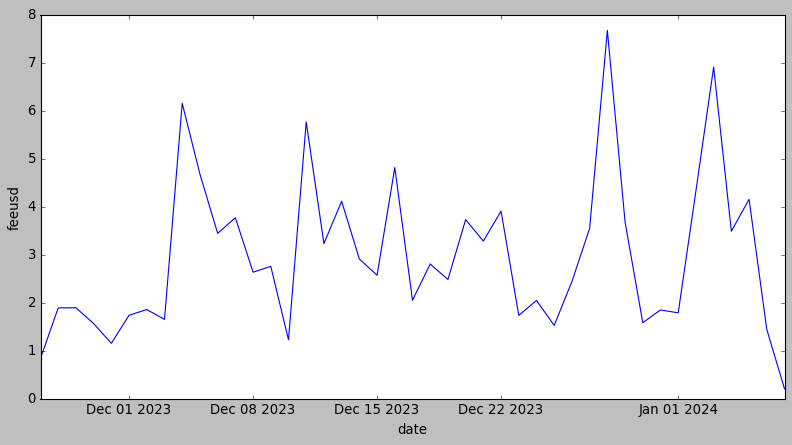

In [45]:
_ = plt.figure(figsize=(12,6))
sns.lineplot(x=final1.index, y=final1.feeusd)

## 2 chart

In [46]:
final2 = dpd_first[['amountV', 'amount0', 'amount1', 'close']].copy()
final2['feeV'] = dpd_sum['feeV'].copy()
final2[['amountVlast']] = dpd_last[['amountV']]

final2['HODL'] = final2['amount0'].iloc[0] + final2['amount1'].iloc[0] * final2['close']
final2['IL'] = final2['amountVlast'] - final2['HODL']
final2['ActiveLiq'] = dpd_mean['ActiveLiq'].copy()
final2['feecumsum'] = final2['feeV'].cumsum()
final2['PNL'] = final2['feecumsum'] + final2['IL']  # -Bfinal['gas']

final2['HODLnorm'] = final2['HODL'] / final2['amountV'].iloc[0] * 100
final2['ILnorm'] = final2['IL'] / final2['amountV'].iloc[0] * 100
final2['PNLnorm'] = final2['PNL'] / final2['amountV'].iloc[0] * 100
final2['feecumsumnorm'] = final2['feecumsum'] / final2['amountV'].iloc[0] * 100

# ch2 = final2[['amountV', 'feecumsum']]
# ch3 = final2[['ILnorm', 'PNLnorm', 'feecumsumnorm']]

final2.to_csv("chart2.csv", sep=";")
final2

,amountV,amount0,amount1,close,feeV,amountVlast,HODL,IL,ActiveLiq,feecumsum,PNL,HODLnorm,ILnorm,PNLnorm,feecumsumnorm
date,,,,,,,,,,,,,,,
2023-11-26,2089.344022,469.825372,0.775133,2089.344022,0.848023,2068.458300,2089.344022,-20.885722,100.0,0.848023,-20.037699,100.000000,-0.999631,-0.959043,0.040588
2023-11-27,2072.929378,380.320466,0.818184,2068.738273,1.897678,2037.375740,2073.371834,-35.996095,100.0,2.745701,-33.250394,99.235541,-1.722842,-1.591427,0.131415
2023-11-28,2043.194693,228.257737,0.892315,2033.964624,1.900451,2056.216152,2046.417646,9.798507,100.0,4.646152,14.444659,97.945462,0.468975,0.691349,0.222374
2023-11-29,2058.645707,305.787850,0.854362,2051.657354,1.570243,2038.243112,2060.131857,-21.888745,100.0,6.216395,-15.672349,98.601850,-1.047637,-0.750109,0.297529
2023-11-30,2037.761353,201.692141,0.905395,2027.919857,1.159899,2059.174736,2041.732150,17.442587,100.0,7.376294,24.818881,97.721205,0.834836,1.187879,0.353044
2023-12-01,2056.618552,295.440573,0.859408,2049.291627,1.745169,2087.545253,2058.298105,29.247148,100.0,9.121463,38.368611,98.514083,1.399824,1.836395,0.436571
2023-12-02,2091.864333,483.970021,0.768368,2092.609735,1.863294,2142.333605,2091.875383,50.458222,100.0,10.984757,61.442980,100.121156,2.415027,2.940778,0.525751
2023-12-03,2143.326376,802.741040,0.618670,2166.883879,1.658483,2159.225946,2149.447693,9.778253,100.0,12.643241,22.421494,102.876677,0.468006,1.073136,0.605130
2023-12-04,2168.967357,991.387437,0.532492,2211.448850,6.160641,2184.640178,2183.991454,0.648724,100.0,18.803882,19.452606,104.530007,0.031049,0.931039,0.899990


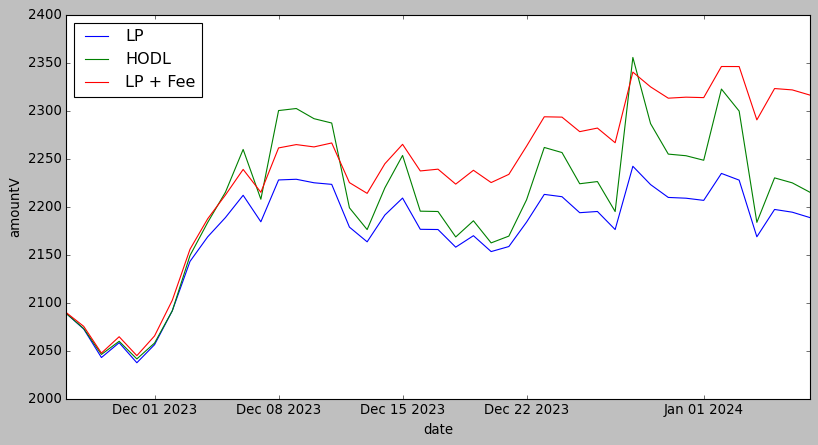

In [47]:
f2 = plt.figure(figsize=(12,6))
sns.lineplot(x=final2.index, y=final2.amountV, label='LP')
sns.lineplot(x=final2.index, y=final2.HODL, label='HODL')
sns.lineplot(x=final2.index, y=final2.amountV + final2.feecumsum, label='LP + Fee')
plt.legend(loc='upper left')

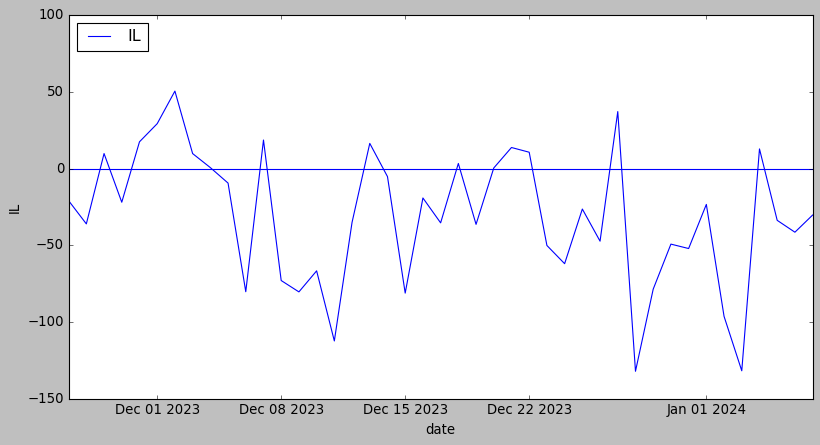

In [48]:
f = plt.figure(figsize=(12,6))
sns.lineplot(data=final2, x='date', y='IL', label='IL')
plt.axhline()
plt.legend(loc='upper left')

In [91]:
final3 = pd.DataFrame()
final3['amountV'] = data['amountV']

final3['amountVlast'] = data['amountV'].shift(-1)
final3['date'] = data['date']
final3['close'] = data['close']
final3['HODL'] = data['amount0'].iloc[-1] + data['amount1'].iloc[-1] * data['close']
# final3['HODL'] = data['amount0'].iloc[0] / data['close'] + data['amount1'].iloc[0]

final3['amountVlast'].iloc[-1] = final3['HODL'].iloc[-1]
final3['IL'] = final3['amountVlast'] - final3['HODL']
final3['feecumsum'] = data['feeV'][::-1].cumsum()
final3['PNL'] = final3['feecumsum'] + final3['IL']
final3['HODLnorm'] = final3['HODL'] / final3['amountV'].iloc[0] * 100
final3['ILnorm'] = final3['IL'] / final3['amountV'].iloc[0] * 100
final3['PNLnorm'] = final3['PNL'] / final3['amountV'].iloc[0] * 100
final3['feecumsumnorm'] = final3['feecumsum'] / final3['amountV'].iloc[0] * 100

# ch2 = final3[['amountV', 'feecumsum']]
# ch3 = final3[['ILnorm', 'PNLnorm', 'feecumsumnorm']]
final3

/var/folders/s0/gcg7k5ws6hxfgnzww6_ryn0c0000gn/T/ipykernel_7495/186161116.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final3['amountVlast'].iloc[-1] = final3['HODL'].iloc[-1]


,amountV,amountVlast,date,close,HODL,IL,feecumsum,PNL,HODLnorm,ILnorm,PNLnorm,feecumsumnorm
0,2185.081290,2183.434881,2024-01-07 03:00:00,2243.538378,2208.865093,-25.430212,127.602266,102.172054,101.088463,-1.163811,4.675893,5.839703
1,2183.434881,2185.243449,2024-01-07 02:00:00,2240.074200,2206.179896,-20.936447,127.569433,106.632986,100.965575,-0.958154,4.880047,5.838201
2,2185.243449,2188.947763,2024-01-07 01:00:00,2243.882142,2209.131556,-20.183792,127.504271,107.320479,101.100658,-0.923709,4.911510,5.835219
3,2188.947763,2183.736718,2024-01-07 00:00:00,2251.866086,2215.320171,-31.583453,127.446508,95.863055,101.383879,-1.445413,4.387162,5.832575
4,2183.736718,2182.517150,2024-01-06 23:00:00,2240.705777,2206.669451,-24.152302,127.390450,103.238149,100.987980,-1.105327,4.724682,5.830010
...,...,...,...,...,...,...,...,...,...,...,...,...
995,2056.491213,2070.702593,2023-11-26 16:00:00,2049.143483,2058.183274,12.519319,0.432544,12.951863,94.192527,0.572945,0.592741,0.019795
996,2070.702593,2070.791692,2023-11-26 15:00:00,2066.026122,2071.269558,-0.477866,0.245997,-0.231870,94.791419,-0.021870,-0.010611,0.011258
997,2070.791692,2084.468755,2023-11-26 14:00:00,2066.134280,2071.353394,13.115361,0.175181,13.290542,94.795256,0.600223,0.608240,0.008017
998,2084.468755,2089.344022,2023-11-26 13:00:00,2083.106555,2084.509158,4.834864,0.074696,4.909560,95.397328,0.221267,0.224685,0.003418


<AxesSubplot:xlabel='date', ylabel='amountV'>

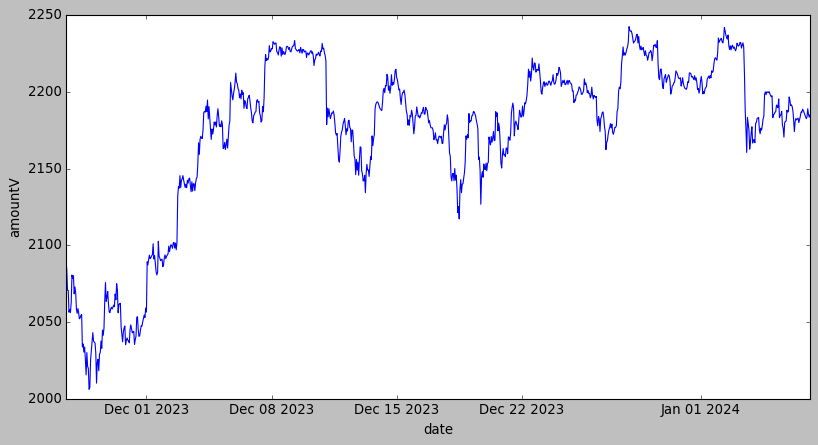

In [50]:
f2 = plt.figure(figsize=(12,6))
sns.lineplot(x=final3.date, y=final3.amountV)
# plt.legend(loc='upper left')

<AxesSubplot:xlabel='date', ylabel='feecumsum'>

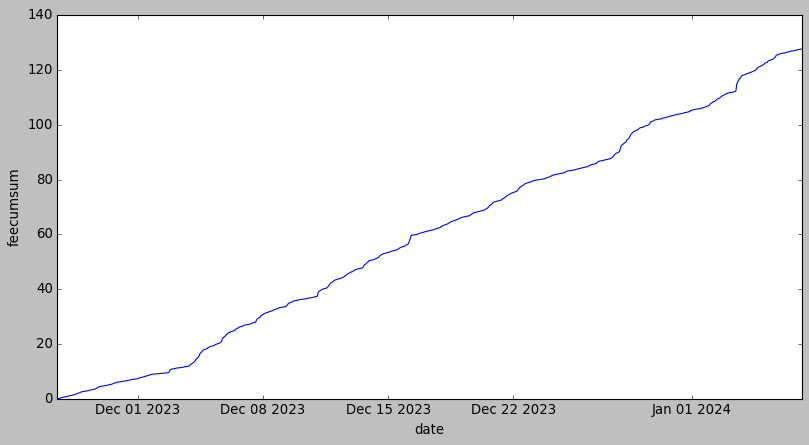

In [51]:
f2 = plt.figure(figsize=(12,6))
sns.lineplot(x=final3.date, y=final3.feecumsum)
# plt.legend(loc='upper left')

<AxesSubplot:xlabel='date', ylabel='ILnorm'>

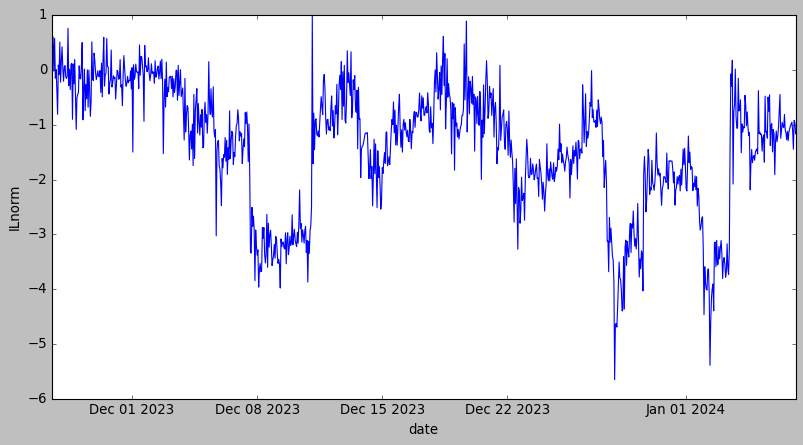

In [52]:
f2 = plt.figure(figsize=(12,6))
sns.lineplot(x=final3.date, y=final3.ILnorm)
# plt.legend(loc='upper left')

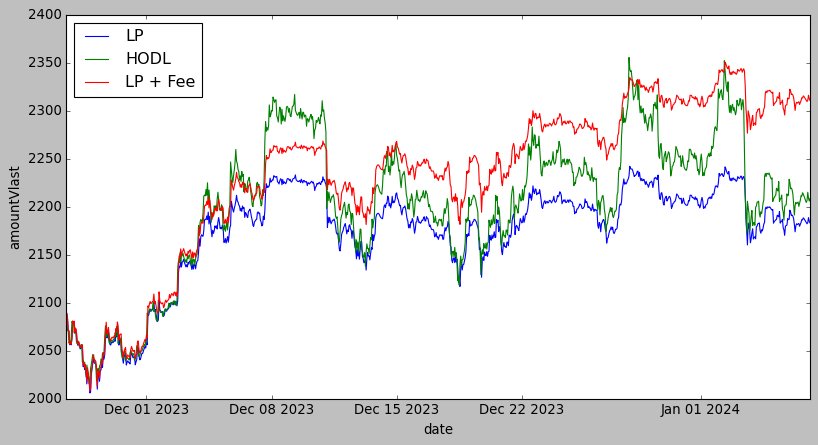

In [55]:
f = plt.figure(figsize=(12,6))
sns.lineplot(data=final3, x='date', y='amountVlast', label='LP')
sns.lineplot(data=final3, x='date', y='HODL', label='HODL')
sns.lineplot(x=final3.date, y=final3.amountVlast + final3.feecumsum, label='LP + Fee')
plt.legend(loc='upper left')

/var/folders/s0/gcg7k5ws6hxfgnzww6_ryn0c0000gn/T/ipykernel_7495/2297315877.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals_y])
/var/folders/s0/gcg7k5ws6hxfgnzww6_ryn0c0000gn/T/ipykernel_7495/2297315877.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,.0%}'.format(x) for x in vals_x])


Text(0.5, 0, 'Current Price as Percentage of Initial Price')

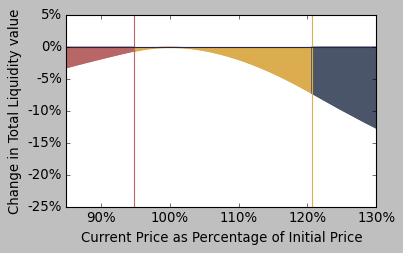

In [89]:
pu = maxi / initial_price
pl = mini / initial_price

f = plt.figure(figsize=(5,3))
# Setting the background color of the plot 
ax = plt.axes()
# ax.set_facecolor("#F0EEDC")

x1 = np.linspace(0, pl, 100)
y1 = (np.sqrt(pl) + x1 / np.sqrt(pl) - 1 - x1) / (1 + x1 - np.sqrt(pl) - x1 / np.sqrt(pu))

x2 = np.linspace(pl, pu, 100)
y2 = (2 * np.sqrt(x2) - 1 - x2) / (1 + x2 - np.sqrt(pl) - x2 / np.sqrt(pu))

x3 = np.linspace(pu, 5, 100)
y3 = (x3 / np.sqrt(pu) + np.sqrt(pu) - 1 - x3) / (1 + x3 - np.sqrt(pl) - x3 / np.sqrt(pu))

plt.plot(x1, y1, color='#B96666')
ax.fill_between(x1, 0, y1, color='#B96666')

plt.plot(x2, y2, color='#DBAD4F')
ax.fill_between(x2, 0, y2, color='#DBAD4F')

plt.plot(x3, y3, color='#4B5569')
ax.fill_between(x3, 0, y3, color='#4B5569')

plt.axvline(x=pl, color='#B96666')
plt.axvline(x=pu, color='#DBAD4F')

plt.axhline(color='#242749')
ax.set_ylim(-0.25, 0.05)
plt.xlim(0.85, 1.3)

plt.rcParams.update({'font.sans-serif':'DejaVu Sans'})

vals_y = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals_y])
vals_x = ax.get_xticks()
ax.set_xticklabels(['{:,.0%}'.format(x) for x in vals_x])

plt.ylabel('Change in Total Liquidity value')
plt.xlabel('Current Price as Percentage of Initial Price')
# plt.savefig('./img/IL_concentrated.png', dpi=500, bbox_inches='tight', transparent=True)

In [98]:
final3['k'] = final3.close / initial_price
final3['IL_percentage'] = (2 * np.sqrt(final3['k']) - 1 - final3['k']) / (1 + final3['k'] - np.sqrt(pl) - final3['k'] / np.sqrt(pu))
final3['IL_new'] = (1 + final3['IL_percentage']) * final3['HODL']
final3['IL_new']

0      2185.081290
1      2183.434881
2      2185.243449
3      2188.947763
4      2183.736718
          ...     
995    2056.491213
996    2070.702593
997    2070.791692
998    2084.468755
999    2089.344022
Name: IL_new, Length: 1000, dtype: float64

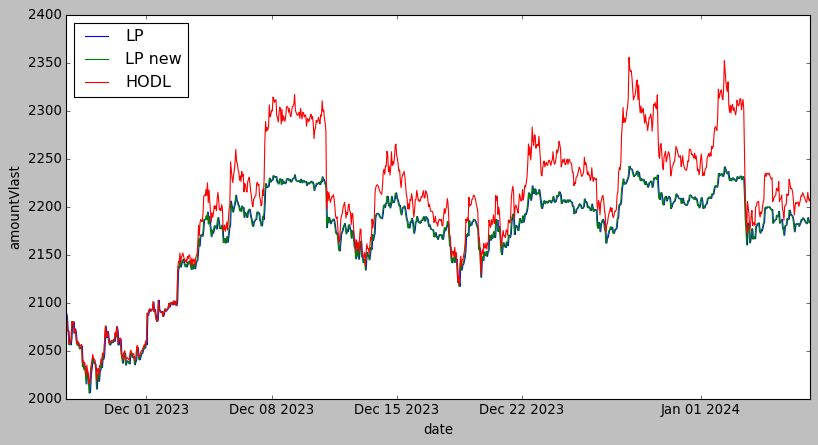

In [99]:
f = plt.figure(figsize=(12,6))
sns.lineplot(data=final3, x='date', y='amountVlast', label='LP')
sns.lineplot(data=final3, x='date', y='IL_new', label='LP new')
sns.lineplot(data=final3, x='date', y='HODL', label='HODL')
plt.legend(loc='upper left')